# EDA

## 1. Wstęp

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("../data/new_york_listings_2024.csv");
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


Z opisu ramki na kaggle wynika, że autor zrobił już część rzeczy za nas (np. wyekstrachował rating z kolumny name).  
Dane orginalnie pochodzą ze strony: [źródło](https://insideairbnb.com/get-the-data/), a znaczenie kolumn można znaleźć w pliku: [oznaczenia](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596) (ze strony airbnb)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

Kolumny, które wymagają wytłumaczenia:
- room_type - [Entire home/apt|Private room|Shared room|Hotel]
- last_review - data ostatniej recenzji
- calculated_host_listings_count - liczba ogłoszeń, które dany host ma w danym mieście (w tym wypadku zakładam NY)
- availability_365 - liczba dni w najbliższym roku, w które można coś sobie zabookować (reszta dni może być zajęta, ponieważ ktoś inny już zabookował termin, ale też, bo host mógł dany termin zablokować)
- number_of_reviews_ltm - liczba opinii o ogłoszeniu z ostatnich 12 miesięcy (warto zaznaczyć, że dane pochodzą z 5 stycznia 2024 roku)
- beds/baths/bedrooms - liczba łóżek/...  
  
Zobaczyć można, że niektóre kolumny mają dziwne typy, np zamiast inta bedrooms i baths mają object (zawierają jakieś stringi czasami). Będzie to trzeba naprawić i w tym celu zobaczmy jak to wygląda "od środka"

In [4]:
import re

def contains_only_numbers_and_dots(s):
    pattern = r"^[0-9.]+$"
    return re.match(pattern, s.strip()) is not None

In [5]:
print(data["rating"][0])
contains_only_numbers_and_dots(data["rating"][0])

5.0 


True

In [6]:
# sprawdzmy jakie inne wartości od liczbowych są w rating, beds i baths
# Trzeba będzie się zastanowić potem co zrobić z tym jak oznaczyć te stringi jako liczby lub wgl co z tym zrobić
to_check = ["rating", "bedrooms", "baths"]
for i in to_check:
    series = data[i].loc[~data[i].apply(contains_only_numbers_and_dots)]
    print(series.value_counts())
    print("------------------------------")

No rating    3593
New           159
Name: rating, dtype: int64
------------------------------
Studio    1815
Name: bedrooms, dtype: int64
------------------------------
Not specified    13
Name: baths, dtype: int64
------------------------------


Wsm to zobaczmy te wiersze co mają baths == not specified

In [7]:
data.loc[data["baths"]=="Not specified"]["name"] # No możemy na spokojnie założyć teraz, że shared baths zaliczają sie do baths

0               Rental unit in Brooklyn · ★5.0 · 1 bedroom
611                    Rental unit in Brooklyn · 1 bedroom
5408                Townhouse in Brooklyn · ★4.87 · Studio
9572     Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...
10537    Rental unit in New York · ★4.17 · 1 bedroom · ...
11399          Rental unit in Brooklyn · 1 bedroom · 1 bed
12800         Home in Brooklyn · ★4.96 · 1 bedroom · 1 bed
13873                   Hotel in New York · Studio · 1 bed
14127                   Home in Queens · ★4.74 · 1 bedroom
14528          Boutique hotel in New York · Studio · 1 bed
15088    Rental unit in New York · ★4.59 · Studio · 2 beds
19524    Rental unit in New York · ★4.86 · 1 bedroom · ...
20750           Rental unit in New York · ★5.0 · 1 bedroom
Name: name, dtype: object

In [8]:
# Co jest zawarte w name (Można odpalić parę razy)
for i in range(20):
    print(data["name"][random.randint(0, 20757)])

Vacation home in Brooklyn · ★5.0 · 1 bedroom · 1 bed · 1 bath
Rental unit in New York · ★4.80 · 2 bedrooms · 2 beds · 1 private bath
Rental unit in Bronx · ★4.78 · 1 bedroom · 1 bed · 1 bath
Rental unit in Brooklyn · ★4.82 · 1 bedroom · 1 bed · 1 private bath
Boutique hotel in New York · ★4.73 · 1 bedroom · 1 bed · 1 private bath
Rental unit in New York · ★5.0 · 1 bedroom · 1 bed · 1 shared bath
Rental unit in Brooklyn · ★4.90 · 3 bedrooms · 3 beds · 2 baths
Rental unit in New York · ★4.86 · Studio · 2 beds · 1 bath
Rental unit in New York · ★5.0 · 1 bedroom
Townhouse in Queens · ★4.90 · 1 bedroom · 1 bed · 1 private bath
Rental unit in Brooklyn · Studio · 1 bath
Townhouse in Queens · ★4.83 · 2 bedrooms · 2 beds · 1 bath
Rental unit in Staten Island · ★4.50 · 2 bedrooms · 1 bed · 1 shared bath
Serviced apartment in New York · ★4.59 · 1 bedroom · 1 bed · 2 shared baths
Rental unit in Queens · ★4.40 · 1 bedroom · 1 bed · 1 shared bath
Rental unit in New York · ★4.36 · 1 bedroom · 1 bed ·

Na wstępie warto porzucić parę bezsensownych kolumn, które wiemy na 100%, że są zbędne.  
Zostawiłbym jednak kolumny name i host_name/id jako, że:
- Jestem ciekawy czy jeśli łazienka jest zaznaczona w name jako "shared" to będzie doliczona do łazienkek itp (edit. tak są)
- Pierwsze 1/2 słowa nie są zapisane nigdzie jako cecha, nie wiem czy warto się tym interesować (edit. uznałem, że nie warto)
- Host_name zawiera właściciela. Czasem na airbnb nie człowiek, a firma wynajmuje lokum. Zatem można zostawić to też jeszcze, bo może to nam dać później jakieś odniesienie (edit. porzuciłem)

In [9]:
data = data.drop(["id"], axis = 1)
data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,30,...,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,...,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,...,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30,...,2023-09-17,0.91,1,363,7,No License,5.0,1,1,1


In [10]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


Z ciekawych rzeczy mozna spojrzec na:
- maksymalną cene za noc (100 000$ !) 
- ludzie z NY jako, że miasto raczej nie jest wypoczynkowe wynajmują poprzez airbnb lokum ludziom głównie w celach jakiejś pracy czy innych dłuższych postojów (>50\% napewno, wystarczy spojrzeć na kwantyle w minimum_nights)

## 2. Pierwsze wykresy

### 2.1 Numeryczne

In [11]:
numerical = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm", "beds"]
hidden_numerical = ["rating", "bedrooms", "baths"]

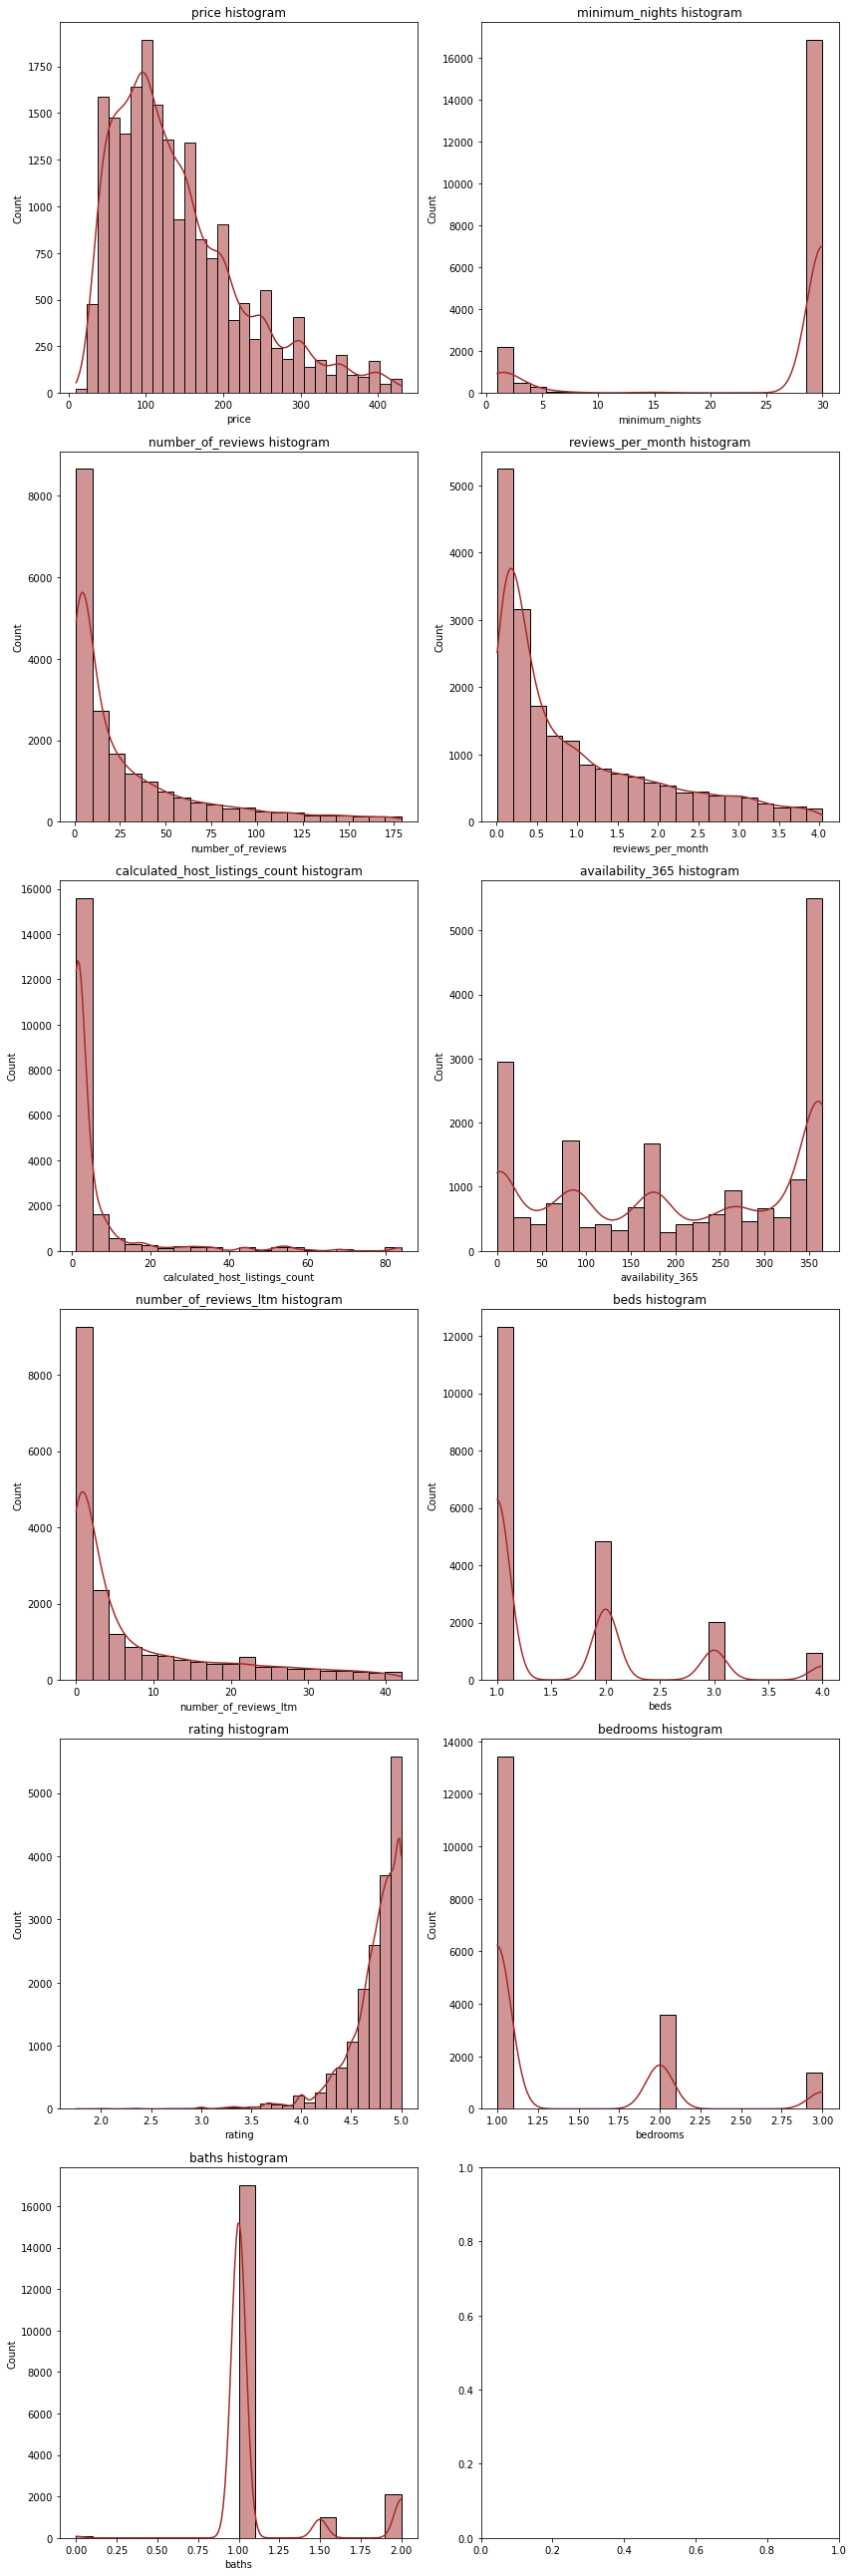

In [12]:
# Odcięte 5% największych obserwacji (inaczej wykresy są tragiczne)
fig, axs = plt.subplots(6, 2, figsize = (12, 36))
axs = axs.flatten()

bins = [30, 20, 20, 20, 20, 20, 20, 20, 30, 20, 20]
# nasze numeryczne
for i, col in enumerate(numerical):
    series = data[col].loc[data[col] <= np.quantile(data[col], 0.95)]
    sns.histplot(x = series, ax=axs[i], color = "brown", kde = True, bins=bins[i]).set(title = col + " histogram")

# te ze stringami
for i, col in enumerate(hidden_numerical):
    series = data[col].loc[data[col].apply(contains_only_numbers_and_dots)].apply(float)
    series = series.loc[series <= np.quantile(series, 0.95)]
    sns.histplot(x = series, ax=axs[8+i], color = "brown", kde = True, bins = bins[i+8]).set(title = col + " histogram")
plt.tight_layout()
plt.show()

Co oznacza 1.5 łazienki?? (Potem będę to castował do jednej najprawdopodobniej)

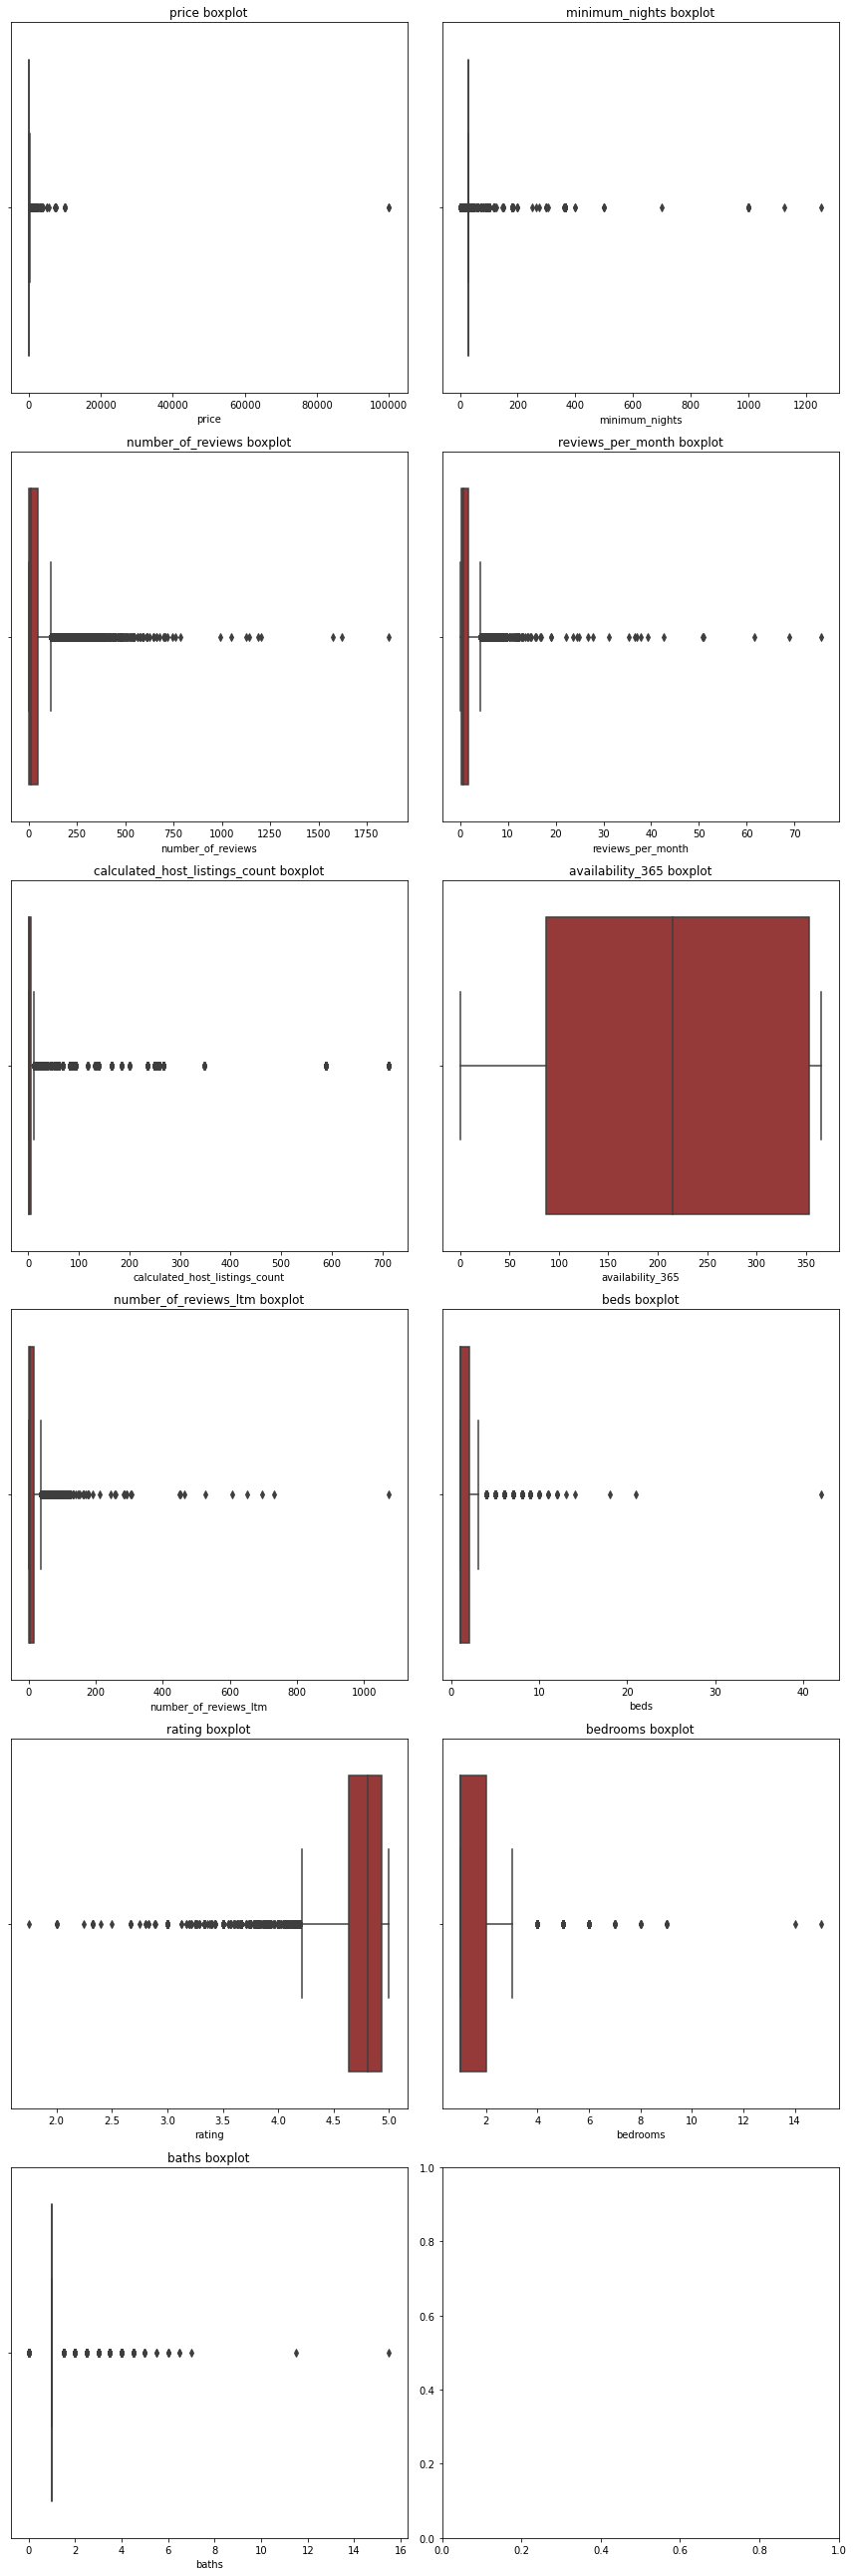

In [13]:
# Ten wykres, żeby pokazać outliery
fig, axs = plt.subplots(6, 2, figsize = (12, 36))
axs = axs.flatten()

# nasze numeryczne
for i, col in enumerate(numerical):
    sns.boxplot(data = data, x = col, ax=axs[i], color = "brown").set(title = col + " boxplot")

# te ze stringami
for i, col in enumerate(hidden_numerical):
    series = data[col].loc[data[col].apply(contains_only_numbers_and_dots)].apply(float)
    sns.boxplot(x = series, ax=axs[8+i], color = "brown").set(title = col + " boxplot")
plt.tight_layout()
plt.show()

No widać, że będzie problem z outlierami (ale pytanie czy jest to problem w zagadnieniu klasteringu?)

### 2.2 Nienumerycze

In [14]:
data.columns.difference(numerical)

Index(['baths', 'bedrooms', 'host_id', 'host_name', 'last_review', 'latitude',
       'license', 'longitude', 'name', 'neighbourhood', 'neighbourhood_group',
       'rating', 'room_type'],
      dtype='object')

In [15]:
nonumerical = ['license', 'neighbourhood', 'neighbourhood_group', 'room_type']

In [16]:
data["host_id"].value_counts() # widać, ze jednak nie ma wiele firm dających na airbnb możliwość wynajęcia (czyli można wywalać potem)

162280872    146
51501835     129
61391963     113
107434423    107
19303369      87
            ... 
136300414      1
543959         1
49634516       1
346356         1
93827372       1
Name: host_id, Length: 12449, dtype: int64

In [17]:
data["license"].value_counts() # Trzeba zbinować do jednej grupy poza no license i exemp

No License            17569
Exempt                 2135
OSE-STRREG-0000068       14
OSE-STRREG-0008664        6
OSE-STRREG-0000437        6
                      ...  
OSE-STRREG-0000131        1
OSE-STRREG-0000288        1
OSE-STRREG-0000215        1
OSE-STRREG-0000985        1
OSE-STRREG-0000513        1
Name: license, Length: 879, dtype: int64

In [18]:
def lic_mapper(a):
    if a == "No License" or a == "Exempt":
        return 0
    else:
        return 1
data["license"] = data["license"].map(lic_mapper) # Jeśli ma licencję to 1, jeśli nie to 0
data["license"].value_counts()

0    19704
1     1054
Name: license, dtype: int64

In [19]:
# Funkcja pomocnicza do pokazywania procentów
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

In [20]:
data["neighbourhood"].isin(data["neighbourhood"].value_counts()[data["neighbourhood"].value_counts()>30].index)

0        True
1        True
2        True
3        True
4        True
         ... 
20753    True
20754    True
20755    True
20756    True
20757    True
Name: neighbourhood, Length: 20758, dtype: bool

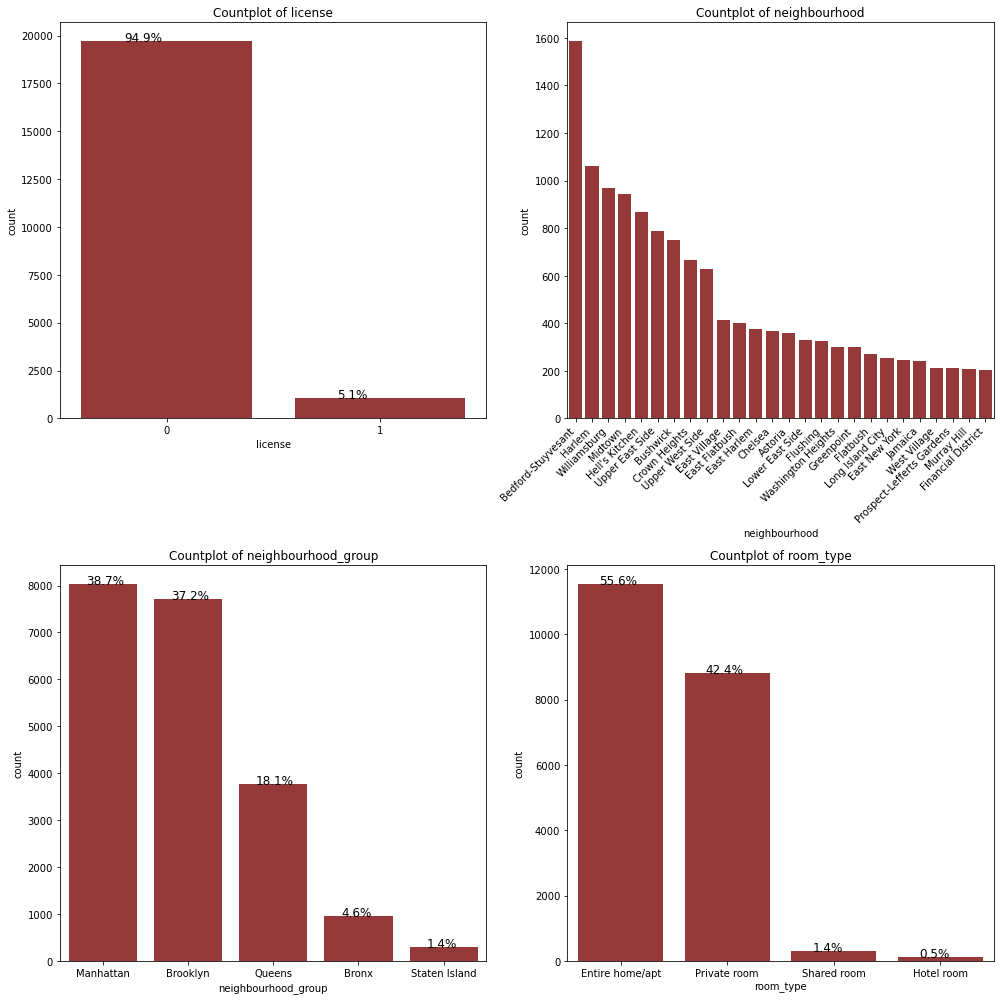

In [21]:
fig, axs = plt.subplots(2, 2, figsize = (14, 14))
axs = axs.flatten()

for i, col in enumerate(nonumerical):
    # Dla zmiennej neighbourhood wybieramy tylko te co mają nie mniej niż 200 występowań w ramce
    if col == "neighbourhood":
        series = data[col]
        counts = series.value_counts()
        series = series[series.isin(counts[counts>200].index)]
        fig = sns.countplot(x = series, ax = axs[i], color="brown", order=series.value_counts().index)
        fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
        axs[i].set(title = "Countplot of " + col)
    else:
        sns.countplot(data = data, x = col, ax = axs[i], color="brown", order=data[col].value_counts().index).set(title = "Countplot of " + col)
        
        without_hue(axs[i], data[col])
    

plt.tight_layout()
plt.show()

### 2.3 Zmiany po plottowaniu w ramce

In [22]:
# Zebrałem tu zmiany, które w następnych KM będzie można już od razu łatwiej implementować
# Trzeba pamiętac, że jeszcze był zmapowany license
# Porzucimy też dane o hoście i name
def bath_mapper(a):
    if a == "Not specified":
        return 0
    else:
        return int(float(a))
def bedroom_mapper(a): # Uznałem, że posiadanie studio (czyli całe mieszkanie w jednym większym pokoju) to tak jakby była jedna sypialnia
    if a == "Studio":
        return 1
    else:
        return int(a)
def rating_mapper(a): # na razie tak może zostać
    if a == "New " or a == "No rating":
        return np.nan
    else:
        return float(a)
data["baths"] = data["baths"].map(bath_mapper)
data["bedrooms"] = data["bedrooms"].map(bedroom_mapper)
data["rating"] = data["rating"].map(rating_mapper)
data["last_review"] =  data["last_review"].map(np.datetime64) # Zmapowałem też date ostatniej opinii do przeznaczonego do tego typu
data = data.drop(["name", "host_id", "host_name"], axis = 1)
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,0,5.00,1,1,0
1,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,0,4.67,2,1,1
2,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,0,4.17,1,2,1
3,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,0,4.64,1,1,1
4,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,0,4.91,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,30,124,2023-09-29,1.81,1,157,12,0,4.75,1,1,1
20754,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,56,2023-07-01,0.48,1,0,1,0,4.46,1,2,1
20755,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,60,2023-12-08,2.09,1,0,27,0,4.93,1,1,1
20756,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30,7,2023-09-17,0.91,1,363,7,0,5.00,1,1,1


In [23]:
data.info() # Wszystko w odpowiednich typach

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             20758 non-null  object        
 1   neighbourhood                   20758 non-null  object        
 2   latitude                        20758 non-null  float64       
 3   longitude                       20758 non-null  float64       
 4   room_type                       20758 non-null  object        
 5   price                           20758 non-null  float64       
 6   minimum_nights                  20758 non-null  int64         
 7   number_of_reviews               20758 non-null  int64         
 8   last_review                     20758 non-null  datetime64[ns]
 9   reviews_per_month               20758 non-null  float64       
 10  calculated_host_listings_count  20758 non-null  int64         
 11  av

### 2.4 Heatmapa po wyczyszczeniu ramki

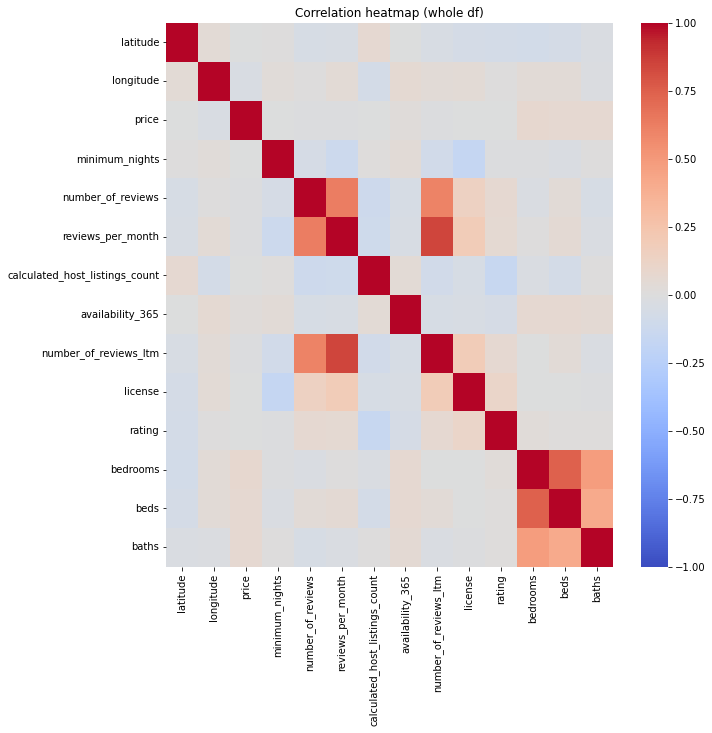

In [24]:
# Nic interesującego nie widać
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), cmap = 'coolwarm', center = 0, vmax = 1, vmin = -1).set(title = "Correlation heatmap (whole df)")
plt.show()

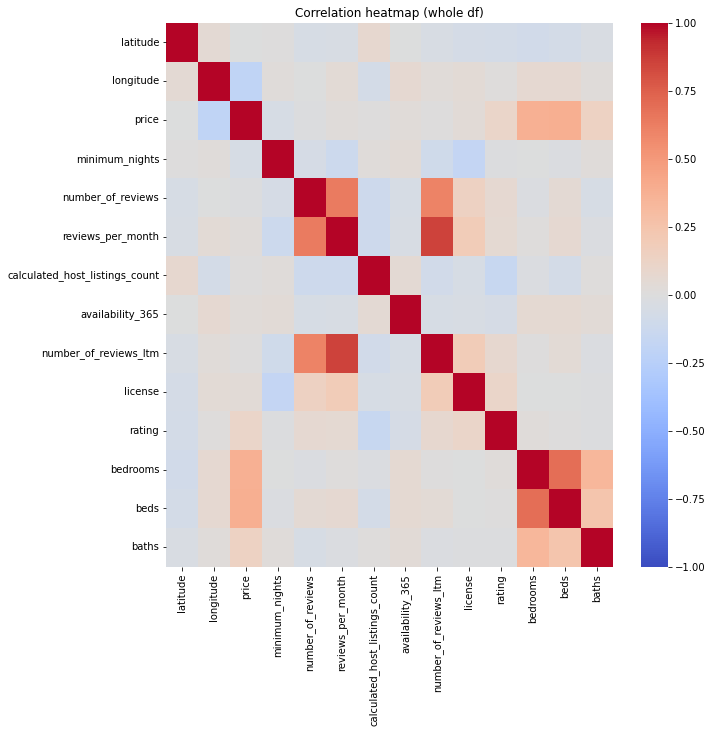

In [25]:
# Jeżeli usuniemy "nienormalne ceny" to mamy trochę lepszą wizję (ale dalej wsm nic)
plt.figure(figsize = (10, 10))
sns.heatmap(data[data["price"] <= np.quantile(data["price"], 0.95)].corr(), cmap = 'coolwarm', center = 0, vmax = 1, vmin = -1).set(title = "Correlation heatmap (whole df)")
plt.show()

### 2.5 Wpływ zmiennych na cenę

Wyobrażając sobie sytuację, że robimy projekt z budowaniem modelu zajmującego się regresją cen... Poza tym te pomysły na wizualiację od razu się nasuwają

In [26]:
numerical = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'rating','bedrooms', 'beds', 'baths']

In [27]:
np.quantile(data["price"], 0.95)

430.0

In [28]:
# Do plotowania usuwam 5% obserwacji górnych price
price_df = data[data["price"] <= np.quantile(data["price"], 0.95)]

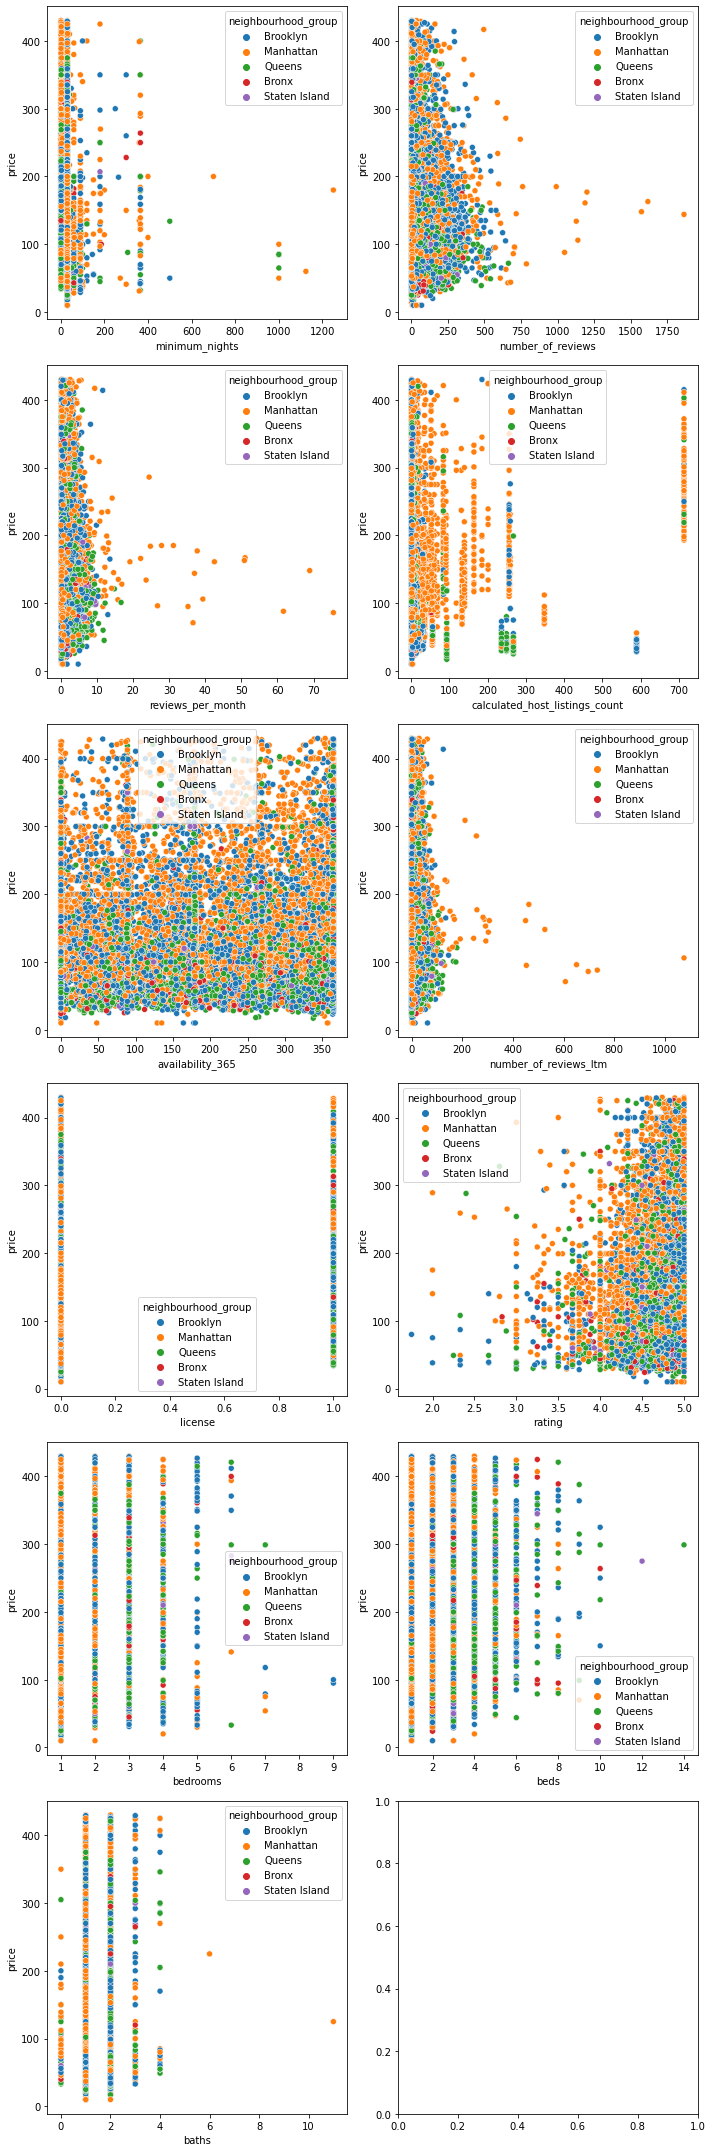

In [29]:
# No cóż punktów jest za dużo, aby sens miały scatter ploty, trzeba zrobić jakąś reprezentacje na heatmapach 
fig, axs = plt.subplots(6, 2, figsize = (10, 30))
axs = axs.flatten()
for i, col in enumerate(numerical):
    sns.scatterplot(data = price_df, y = "price", x = col, ax = axs[i], hue = "neighbourhood_group")
plt.tight_layout()
plt.show()

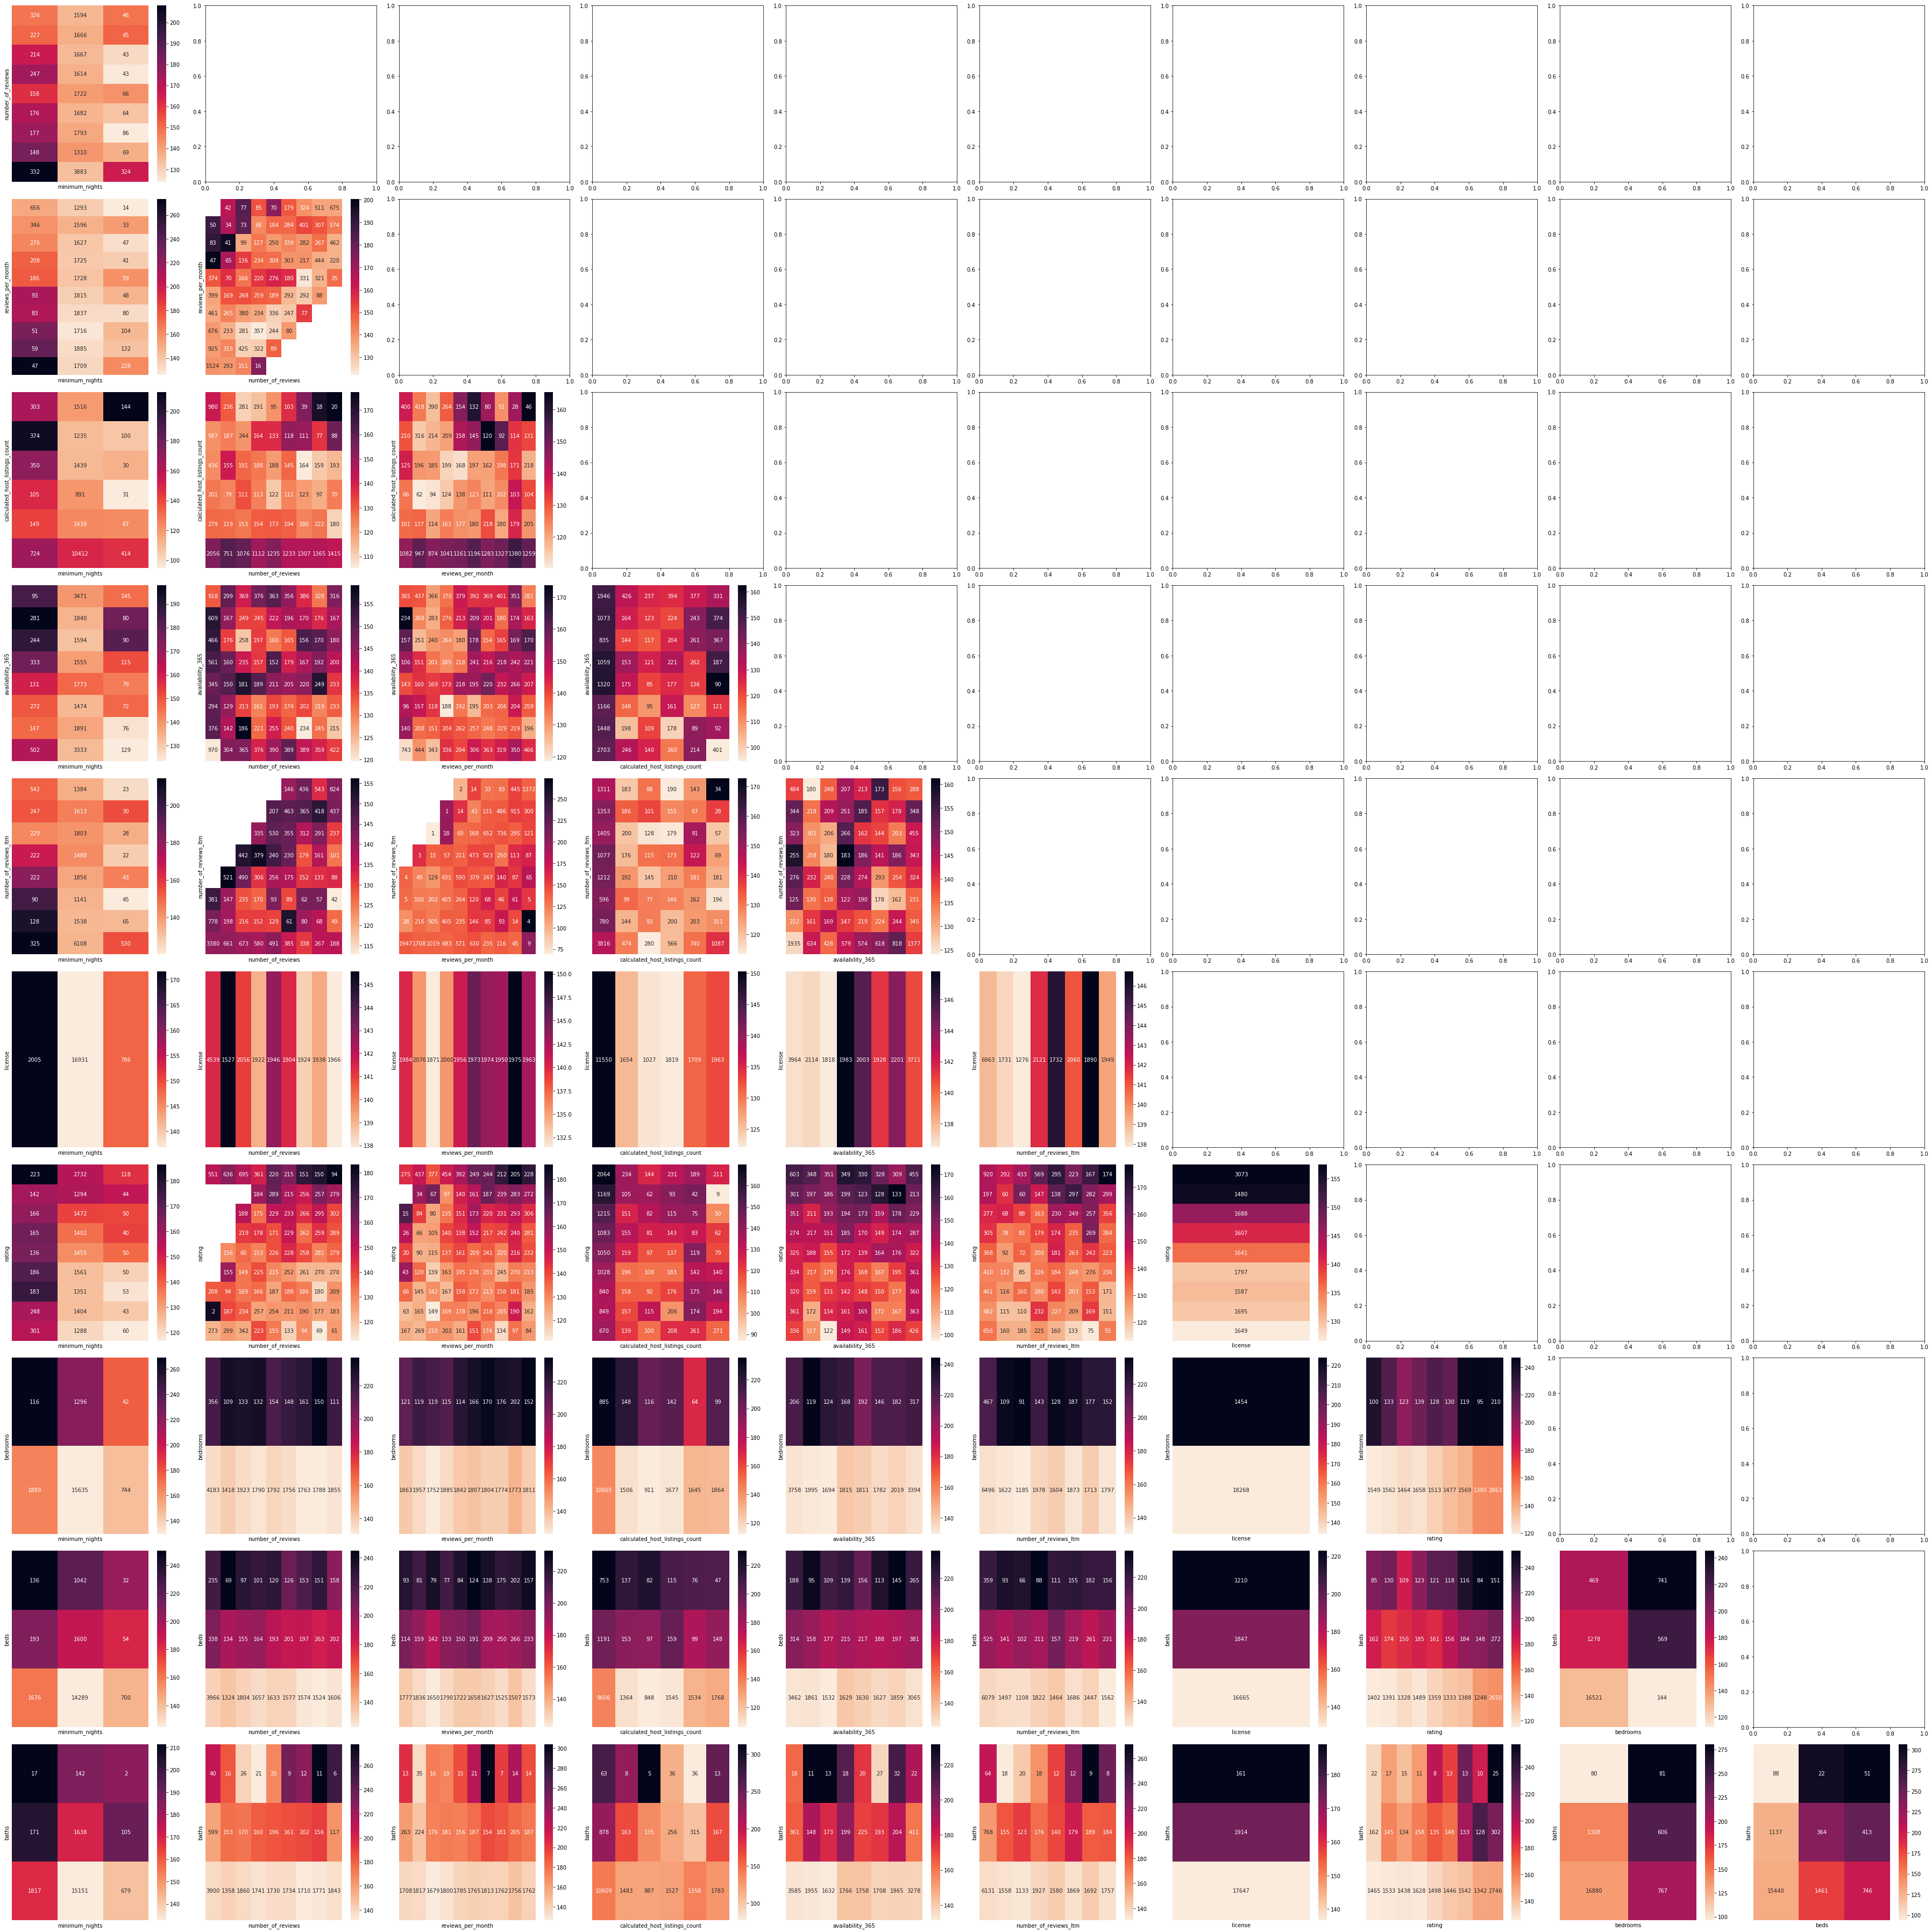

In [32]:
# Plot zapożyczony z poprzedniego projektu (W tym wypadku wpływ połączenia dwóch zmiennych numerycznych na cenę)
# Im ciemniejszy kwadrat tym wyższa jest średnia cena obserwacji danego kwadratu.
# Im bardziej w prawo lub im bardziej w górę tym wyższa wartość odpowiedniej zmiennej
# Wykres warto pobrać i tam sprawdzać jak wygląda na przybliżeniu
bins = 10
fig, axs = plt.subplots(10, 10, figsize = (50, 50))
fig.subplots_adjust(hspace = 0.4)

for i, col1 in enumerate(numerical):
    for j, col2 in enumerate(numerical):
        if j < i:
            df = pd.DataFrame({col1: pd.qcut(price_df[col1], q = bins, duplicates = "drop"),\
                  col2: pd.qcut(price_df[col2], q = bins, duplicates = "drop"),\
                  "price": price_df["price"].copy()})
            annot = df.groupby([col1, col2]).count().reset_index().pivot(index=col1, columns=col2, values="price").sort_index(ascending = False)
            df = df.groupby([col1, col2]).mean().reset_index().pivot(index=col1, columns=col2, values="price").sort_index(ascending = False)
            fig = sns.heatmap(df, cmap = sns.cm.rocket_r, ax = axs[i - 1][j], annot = annot, fmt='g')
            fig.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.tight_layout()
plt.show()

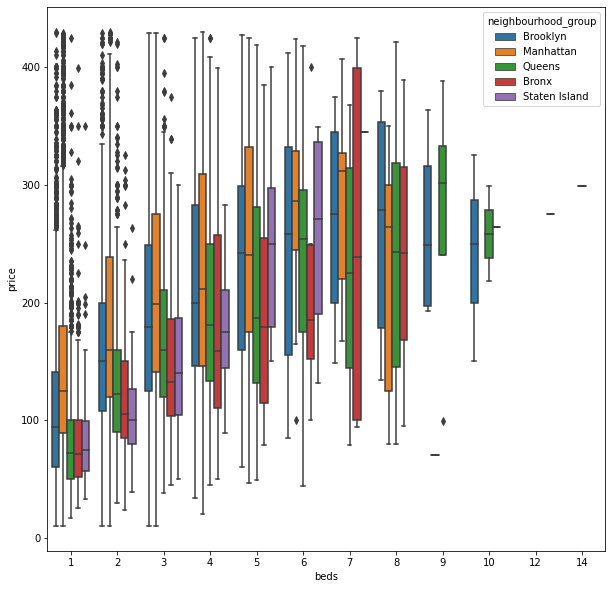

In [39]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = price_df, y = "price", x = "beds", hue = "neighbourhood_group")
plt.show()

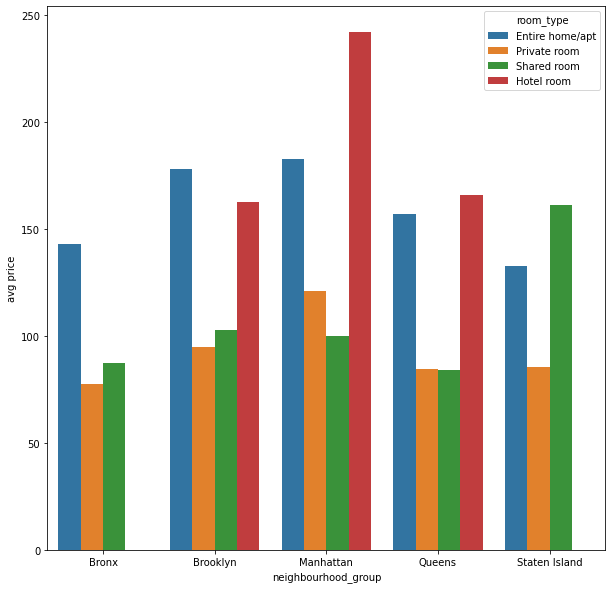

In [61]:
# Wpływ typu pokoju
df = price_df[["price", "neighbourhood_group", 'room_type']].groupby(["neighbourhood_group", 'room_type']).mean().reset_index()

plt.figure(figsize = (10, 10))
ax = sns.barplot(data = df, y = "price", x = "neighbourhood_group", hue = "room_type")
ax.set(ylabel = "avg price")
plt.show()

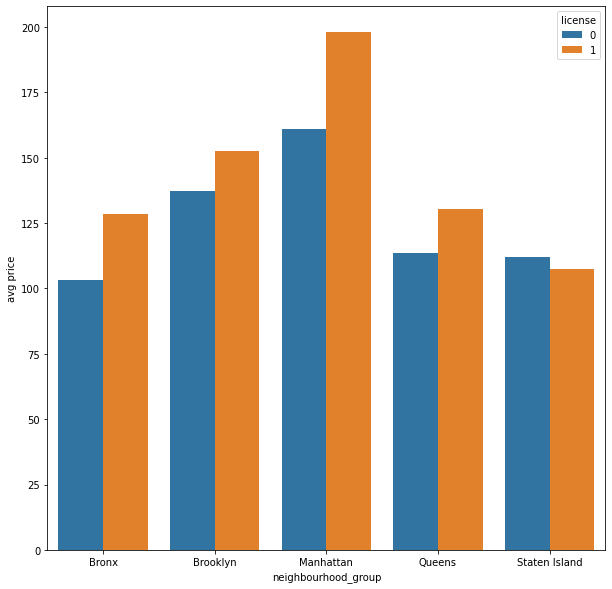

In [62]:
# Wpływ tego, czy lokum ma licencje?
df = price_df[["price", "neighbourhood_group", 'license']].groupby(["neighbourhood_group", 'license']).mean().reset_index()

plt.figure(figsize = (10, 10))
ax = sns.barplot(data = df, y = "price", x = "neighbourhood_group", hue = "license")
ax.set(ylabel = "avg price")
plt.show()

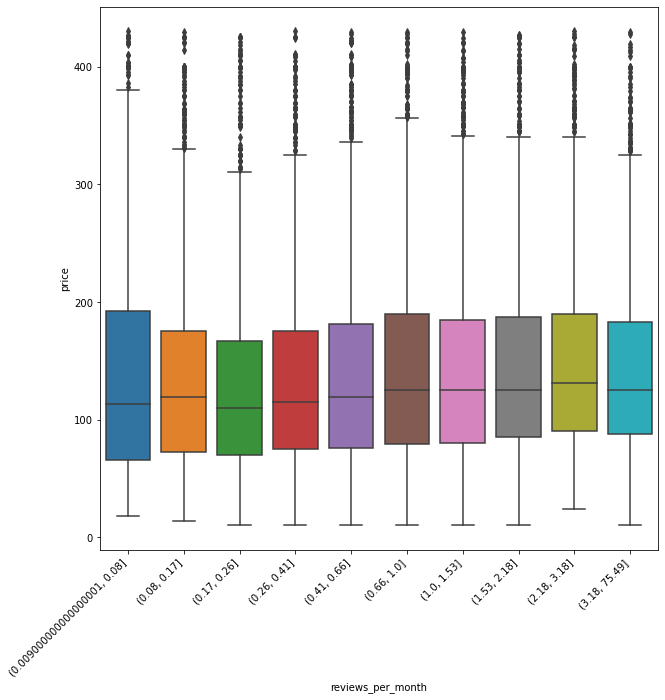

In [90]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data = price_df, y = "price", x = pd.qcut(price_df["reviews_per_month"], q = 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

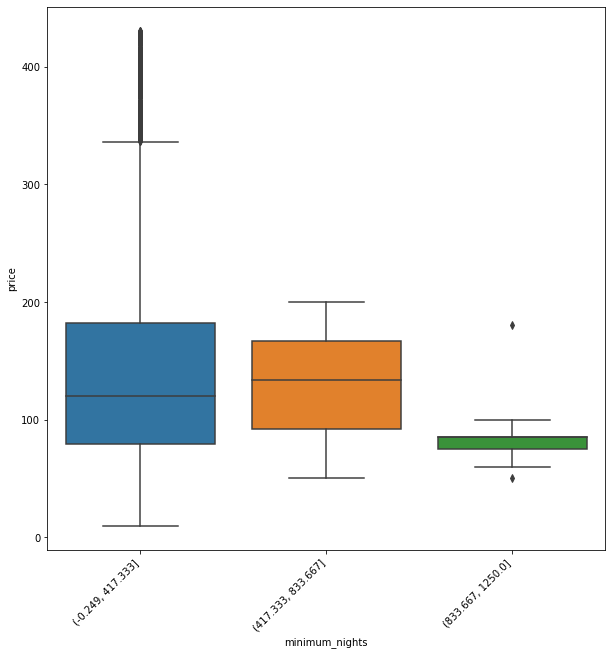

In [99]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data = price_df, y = "price", x = pd.cut(price_df["minimum_nights"], bins = 3))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### 2.6 Wpływ zmiennych na rating

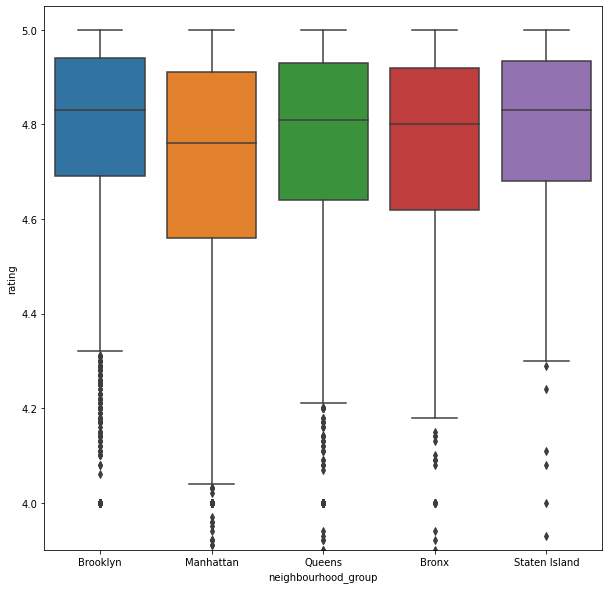

In [78]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = price_df, y = "rating", x = "neighbourhood_group")
plt.ylim([3.9,5.05])
plt.show()

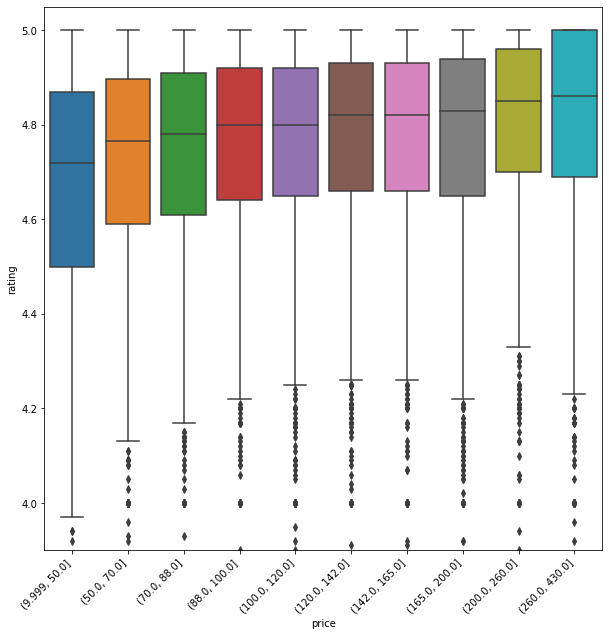

In [82]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data = price_df, y = "rating", x = pd.qcut(price_df["price"], q = 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim([3.9,5.05])
plt.show()

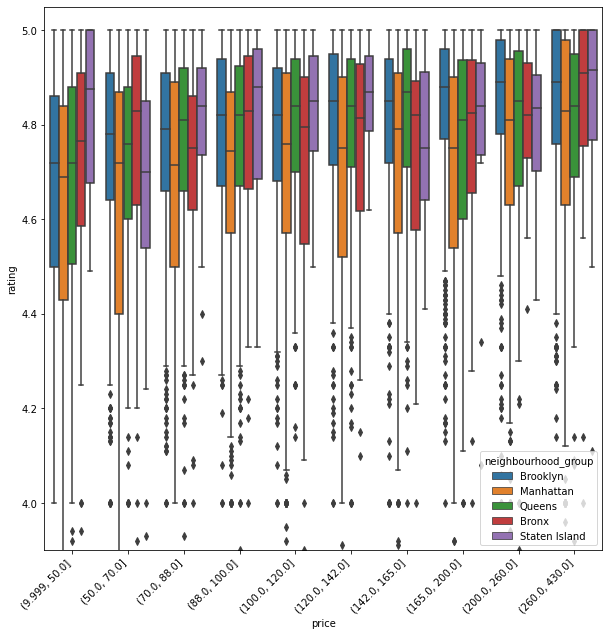

In [76]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data = price_df, y = "rating", x = pd.qcut(price_df["price"], q = 10), hue = "neighbourhood_group")
sns.move_legend(ax, 'lower right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim([3.9,5.05])
plt.show()

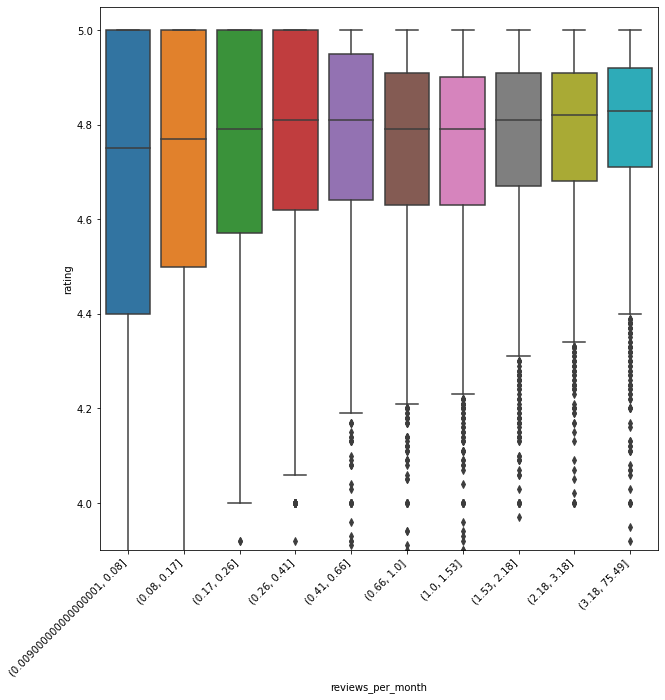

In [88]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(data = price_df, y = "rating", x = pd.qcut(price_df["reviews_per_month"], q = 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim([3.9,5.05])
plt.show()

In [86]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19722 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             19722 non-null  object        
 1   neighbourhood                   19722 non-null  object        
 2   latitude                        19722 non-null  float64       
 3   longitude                       19722 non-null  float64       
 4   room_type                       19722 non-null  object        
 5   price                           19722 non-null  float64       
 6   minimum_nights                  19722 non-null  int64         
 7   number_of_reviews               19722 non-null  int64         
 8   last_review                     19722 non-null  datetime64[ns]
 9   reviews_per_month               19722 non-null  float64       
 10  calculated_host_listings_count  19722 non-null  int64         
 11  av

## 3. Mapy

To be continued...